In [376]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import os

Exercise 8.2
----
Suppose you draw a sample with size n = 10 from an exponential distribution with λ = 2. Simulate this experiment 1000 times and plot
the sampling distribution of the estimate L. Compute the standard error of
the estimate and the 90% confidence interval.

Repeat the experiment with a few different values of n and make a plot of
standard error versus n

In [377]:
def estimate_exp(lam,n,iterations):
    lambda_estimate  = []
    
    for _ in range(iterations):
        sample = np.random.exponential(scale=1/lam,size=n)
        L = 1/np.mean(sample)
        
        lambda_estimate.append(L)
    
    return lambda_estimate

def RMSE(estimates,actual):
    return (np.mean([(estimate-actual)**2 for estimate in estimates]))**0.5

def MeanError(estimates,actual):
    return np.mean([(estimate-actual) for estimate in estimates])

In [378]:
sample_lambda = estimate_exp(lam=2,n=10,iterations=1000)
RMSE(sample_lambda,2)

0.8457942981302494

In [379]:
def eval_cdf(value,series):
    count =0
    for x in series:
        if x <= value:
            count += 1
    return count/len(series)

def compute_cdf(series):
    x = sorted(list(series))
    y = []
    for value in x:
        y.append(eval_cdf(value,x))
    return x,y
def percentile(p,series):
    series, cdfs = compute_cdf(series)
    if p < min(cdfs):
        p = min(cdfs)
    return series[cdfs.index(max([cdf for cdf in cdfs if cdf <=p]))]

90% confidence interval is: 1.2768991361363176 to 3.8749762824739755


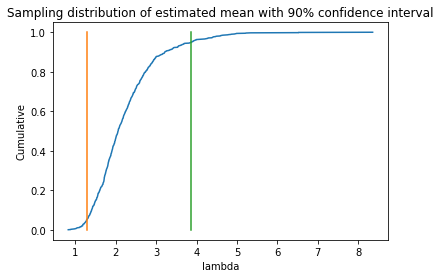

In [380]:
x,y = compute_cdf(sample_lambda)

wgt_5 = percentile(0.05,x)
wgt_95 = percentile(0.95,x)

plt.plot(x,y)
plt.title('Sampling distribution of estimated mean with 90% confidence interval')
plt.xlabel('lambda')
plt.ylabel('Cumulative')
plt.plot([wgt_5,wgt_5],[0,1])
plt.plot([wgt_95,wgt_95],[0,1])

print('90% confidence interval is: '+str(wgt_5)+' to '+str(wgt_95))

In [381]:
# plot for sample error vs n
SE = []
sample_size = np.arange(start=1,stop=40,step=1)
for num in sample_size:
    SE.append(RMSE(estimate_exp(lam=2,n=num,iterations=1000),actual=2))

Text(0,0.5,'standard error')

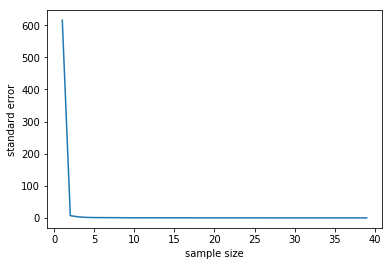

In [382]:
plt.plot(sample_size,SE)
plt.xlabel('sample size')
plt.ylabel('standard error')

exercise 8.3
---

In games like hockey and soccer, the time between goals is
roughly exponential. So you could estimate a team’s goal-scoring rate by
observing the number of goals they score in a game. This estimation process
is a little different from sampling the time between goals, so let’s see how it
works.

Write a function that takes a goal-scoring rate, lam, in goals per game, and
simulates a game by generating the time between goals until the total time
exceeds 1 game, then returns the number of goals scored

In [383]:
def goals_scored(goals,game_length):
    # game_length in mins
    # rate is the goals per game
    goal_diff = []
    rate = goals/game_length
    if rate !=0:
        while sum(goal_diff) <= game_length:
            time_diff = np.random.exponential(scale=1/rate)
            goal_diff.append(time_diff)

        if sum(goal_diff) > game_length:
            goal_diff = goal_diff[0:-1]

        if len(goal_diff) == 0:
            goal_diff = [0]
    else:
        goal_diff = [0]
        
    return len(goal_diff)    

In [391]:
# rate of goal scored 
goal_per_game = 4
goals_scored(goal_per_game,90)

2

In [385]:
def simulate_season(goals,game_length,matches):
    estimated_lam = [] 
    for _ in range(matches):
        lam = goals_scored(goals,game_length)
        estimated_lam.append(lam)
        
    return estimated_lam

In [386]:
goal_rates = simulate_season(goals=goal_per_game,game_length=90,matches=1000)

In [387]:
print('Mean RMSE: ',RMSE(goal_rates,actual=goal_per_game),' | Mean Error: ',MeanError(goal_rates,actual=goal_per_game))

Mean RMSE:  1.96596032513375  | Mean Error:  -0.041


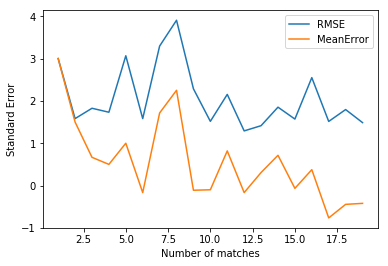

In [388]:
games = np.arange(1,20,1)
error1 = []
error2 = []
for game in games:
    goal_rates = simulate_season(goals=goal_per_game,game_length=90,matches=game)
    error1.append(RMSE(goal_rates,goal_per_game))
    error2.append(MeanError(goal_rates,goal_per_game))
    
plt.plot(games,error1,label='RMSE')
plt.plot(games,error2,label='MeanError')
plt.xlabel('Number of matches')
plt.ylabel('Error')
plt.legend()

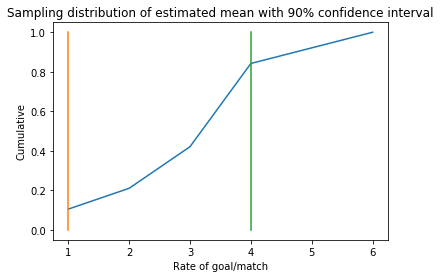

In [389]:
x,y= compute_cdf(goal_rates)

wgt_5 = percentile(0.05,x)
wgt_95 = percentile(0.95,x)

plt.plot(x,y)
plt.title('Sampling distribution of estimated mean with 90% confidence interval')
plt.xlabel('Rate of goal/match')
plt.ylabel('Cumulative')
plt.plot([wgt_5,wgt_5],[0,1])
plt.plot([wgt_95,wgt_95],[0,1])

Text(0,0.5,'Standard Error')

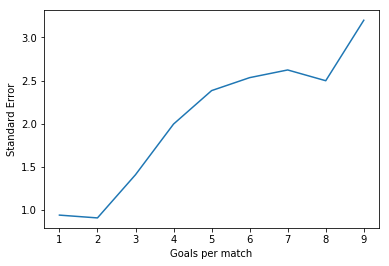

In [390]:
error = []
lambdas = np.arange(1,10,1)
for L in lamdas:
    goal_rates = simulate_season(goals=L,game_length=90,matches=50)
    error.append(RMSE(goal_rates,actual=L))

plt.plot(lambdas,error)
plt.xlabel('Goals per match')
plt.ylabel('Standard Error')

conclusions - 

1. sampling error increases for a larger value of goals scored
2. As the number of matches (n) increases the RMSE remains almost constant, which shows that the L is a biased estimator

this statement is contradicting with the book